In [2]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
x_train = pd.read_csv("x_train.csv",index_col=False)
y_train = pd.read_csv("y_train.csv",index_col=False)
x_test = pd.read_csv("x_test.csv",index_col=False)
y_test = pd.read_csv("y_test.csv",index_col=False)

,POL_MotivoAnulacion,POL_DescripcionMotivo
0,5.0,pol
1,6.0,Impago NO RENUEVA POR PRECIO
2,5.0,REEMPLAZO
3,7.0,Ninguno SOLICITUD ASEGURADO OTRAS CAUSAS
4,6.0,camibo a Allianz
...,...,...
143919,1.0,CORREO JVIDAL ANULACION
143920,8.0,CONTRATA CON BANCO
143921,8.0,VENDERA VEH
143922,3.0,WEB CIA


In [10]:
model = CatBoostClassifier(random_state=0, max_depth=15, eval_metric="Accuracy", task_type="GPU", devices='0:1')

model.fit(x_train,y_train)

#Predict Output

model.score(x_test,y_test)

Learning rate set to 0.170912
0:	learn: 0.5139874	total: 1.19s	remaining: 19m 51s
1:	learn: 0.5582122	total: 2.35s	remaining: 19m 31s
2:	learn: 0.5738021	total: 3.72s	remaining: 20m 35s
3:	learn: 0.5872033	total: 5s	remaining: 20m 46s
4:	learn: 0.5894614	total: 6.17s	remaining: 20m 28s
5:	learn: 0.5956192	total: 7.39s	remaining: 20m 24s
6:	learn: 0.6028626	total: 8.61s	remaining: 20m 21s
7:	learn: 0.6089335	total: 9.77s	remaining: 20m 11s
8:	learn: 0.6107314	total: 10.9s	remaining: 20m 2s
9:	learn: 0.6192081	total: 12.1s	remaining: 19m 58s
10:	learn: 0.6232033	total: 13.2s	remaining: 19m 50s
11:	learn: 0.6250011	total: 14.5s	remaining: 19m 50s
12:	learn: 0.6326874	total: 15.6s	remaining: 19m 46s
13:	learn: 0.6389494	total: 16.8s	remaining: 19m 45s
14:	learn: 0.6417287	total: 18s	remaining: 19m 40s
15:	learn: 0.6430836	total: 19.1s	remaining: 19m 35s
16:	learn: 0.6449596	total: 20.3s	remaining: 19m 32s
17:	learn: 0.6471222	total: 21.4s	remaining: 19m 29s
18:	learn: 0.6501359	total: 22.6

0.7331943720687858

In [11]:
#Resultado antiguo sin over samplig
y_pred = model.predict(x_test)
aux=confusion_matrix(y_test, y_pred)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.82      0.83      0.82      3259
         2.0       0.71      0.63      0.67      1115
         3.0       0.80      0.88      0.84      4766
         4.0       0.72      0.48      0.57       656
         5.0       0.77      0.62      0.69      3329
         6.0       0.65      0.72      0.68      2402
         7.0       0.69      0.75      0.72      4831
         8.0       0.66      0.73      0.69      4527
         9.0       0.72      0.37      0.48       104
        10.0       0.77      0.70      0.73       640
        11.0       0.77      0.59      0.67       851
        12.0       0.58      0.20      0.30       420
        13.0       0.85      0.70      0.77       208
        17.0       0.90      0.83      0.86       777
        20.0       0.54      0.39      0.45       158
        25.0       0.69      0.81      0.74       742

    accuracy                           0.73     28785
   macro avg       0.73   

In [12]:
aux=confusion_matrix(y_test, y_pred)

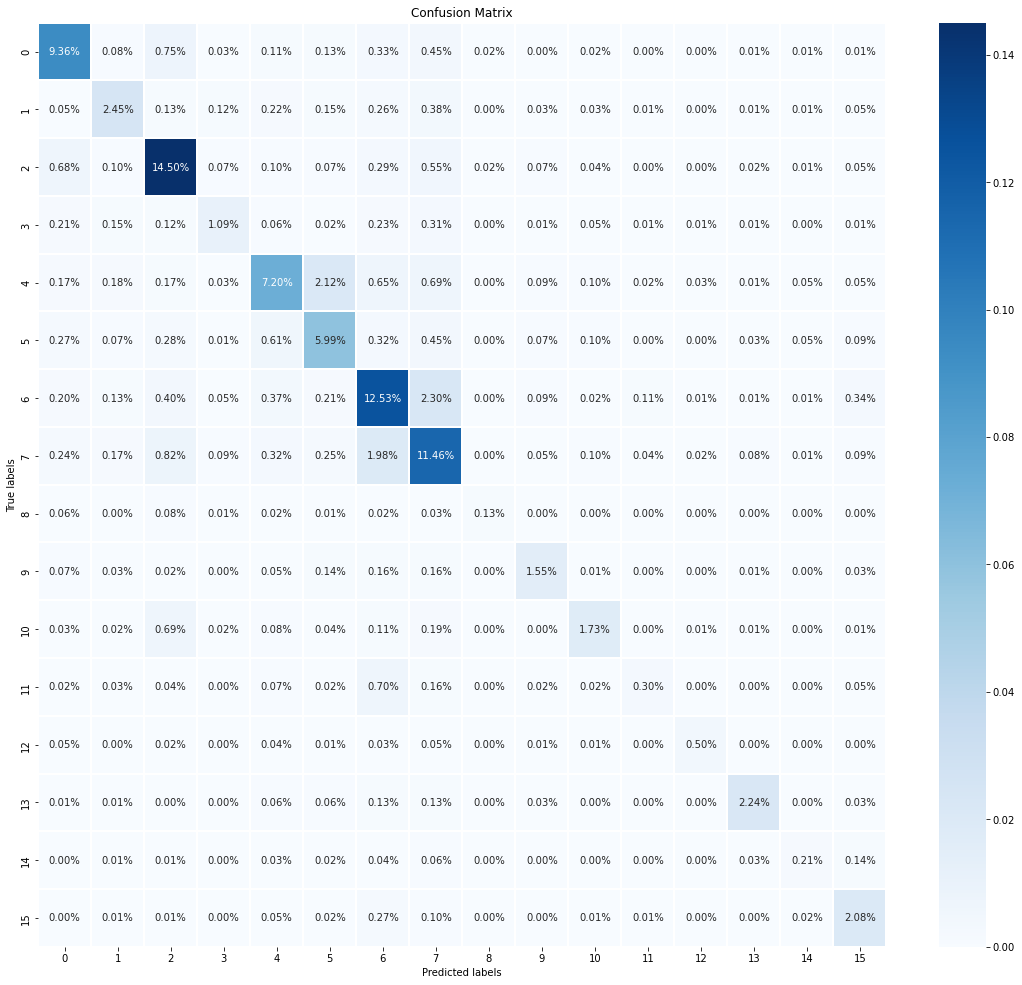

In [13]:
plt.figure(figsize = (19,17))
ax = sns.heatmap(aux/np.sum(aux), annot=True,linewidths=1, fmt=".2%", cmap='Blues')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 